In [27]:
import requests
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from torch.utils.data import Dataset, DataLoader



In [2]:
# set_numbers = [f'0{i}' for i in range(1,8)]
# card_numbers = [f'{i:03}' for i in range(1,120)]

In [3]:
# base_url = 'https://image.optcg.gg/images/en/'

# os.mkdir('C:\\Users\\Wayne Ewing\\Pictures\\card images\\')

In [4]:
# save_path = 'C:\\Users\\Wayne Ewing\\Pictures\\optcg_images'
# save_path


In [5]:
# os.mkdir('C:\\Users\\Wayne Ewing\\Pictures\\card images\\digimontcg_images')
# digimon_url = 'https://images.digimoncard.io/images/cards/'
# digi_save_path = 'C:\\Users\\Wayne Ewing\\Pictures\\card images\\digimontcg_images'

In [6]:
# digi_set = [f'{i}' for i in range(1,8)]
# digi_numbers = [f'{i:03}' for i in range(1,113)]

In [5]:
def pull_images(set_range,card_range,url,save_path):
    for set_num in set_range:
        for card_num in tqdm(card_range):
            #Change image url to fit file extension and tcg identifier
            image_url = f'{url}BT{set_num}-{card_num}.jpg'
        
            try:

                response = requests.get(image_url)
                response.raise_for_status()

                #Change image path to fit file extension and tcg identifier
                image_path = os.path.join(save_path,f'BT{set_num}-{card_num}.png')

                if response.status_code == 200:
                    with open(image_path, 'wb') as f:
                        f.write(response.content)
                else:
                    print(f"Image not found or failed to download: {image_url} (Status code: {response.status_code})")

            except requests.exceptions.HTTPError as err:
                print(f'Image not found: {image_url}')

In [6]:
def preprocess_image(image_path, output_path, size=(256, 256)):
    # print(image_path)
    image = cv.imread(image_path)

    #resize image
    resized_image = cv.resize(image,size,interpolation = cv.INTER_LINEAR)

    #normalizing image pixels
    resized_image = resized_image.astype('float32')/255.0

    normalized_image = (resized_image * 255).astype('uint8')

    # print(image)
    cv.imwrite(output_path, normalized_image)

def directory_resize(base_path,output_path,size=(256,256)):
    for file in tqdm(os.listdir(base_path)):
        preprocess_image(os.path.join(base_path,file),os.path.join(output_path,file),size)

In [7]:
digi_base_path = r'C:\Users\Wayne\OneDrive\Documents\GitHub\ComputerVision-Project\card_images\digimontcg_images'
op_base_path =  r'C:\Users\Wayne\OneDrive\Documents\GitHub\ComputerVision-Project\card_images\optcg_images'

digi_output_path = r'C:\Users\Wayne\OneDrive\Documents\GitHub\ComputerVision-Project\resized_images\resized_digimontcg_images'
op_output_path = r'C:\Users\Wayne\OneDrive\Documents\GitHub\ComputerVision-Project\resized_images\resized_optcg_images'

In [10]:
# directory_resize(digi_base_path,digi_output_path)
# directory_resize(op_base_path,op_output_path)

In [8]:
class TradingCardDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        # self.root_dir = root_dir
        self.transform = transform
        # self.classes = sorted(os.listdir(root_dir))
        self.image_paths = image_paths
        self.labels = labels

        # for label, class_name in enumerate(self.classes):
        #     class_dir = os.path.join(root_dir, class_name)
        #     for img_name in os.listdir(class_dir):
        #         img_path = os.path.join(class_dir, img_name)
        #         self.image_paths.append(img_path)
        #         self.labels.append(label)
        # self.train_paths, self.test_paths, self.train_labels, self.test_labels = train_test_split(self.image_paths, self.labels, test_size=0.2, random_state=42)     
        # self.train_paths, self.val_paths, self.train_labels, self.val_labels = train_test_split(self.train_paths, self.train_labels, test_size=0.25, random_state=42)  

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        # print(f"Loaded image shape: {image.shape}")  # Print the shape of the image
        
        return image, label

In [34]:
root_dir = r'C:\Users\Wayne\OneDrive\Documents\GitHub\ComputerVision-Project\resized_images'
classes = sorted(os.listdir(root_dir))
image_paths = []
labels = []

for label, class_name in enumerate(classes):
    class_dir = os.path.join(root_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        image_paths.append(img_path)
        labels.append(label)

train_paths, temp_paths, train_labels, temp_labels = train_test_split(image_paths, labels, test_size=0.3, random_state=42)
val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.5, random_state=42)



In [18]:
train_set = set(train_paths)
val_set = set(val_paths)
test_set = set(test_paths)

# Check for overlaps
train_val_overlap = train_set.intersection(val_set)
train_test_overlap = train_set.intersection(test_set)
val_test_overlap = val_set.intersection(test_set)

# Print results
print(f"Number of overlapping images between train and val: {len(train_val_overlap)}")
print(f"Number of overlapping images between train and test: {len(train_test_overlap)}")
print(f"Number of overlapping images between val and test: {len(val_test_overlap)}")

if train_val_overlap:
    print("Overlap found between train and validation sets:")
    print(train_val_overlap)

if train_test_overlap:
    print("Overlap found between train and test sets:")
    print(train_test_overlap)

if val_test_overlap:
    print("Overlap found between validation and test sets:")
    print(val_test_overlap)

Number of overlapping images between train and val: 0
Number of overlapping images between train and test: 0
Number of overlapping images between val and test: 0


In [19]:
transform = transforms.Compose([transforms.RandomRotation(degrees=15),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomVerticalFlip(),
                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                            ])

In [20]:
train_dataset = TradingCardDataset(train_paths, train_labels, transform=transform)
val_dataset = TradingCardDataset(val_paths, val_labels,transform=transform)
test_dataset = TradingCardDataset(test_paths, test_labels,transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)


In [21]:
print(f"Number of images in train dataset: {len(train_dataset)}")
print(f"Number of images in validation dataset: {len(val_dataset)}")
print(f"Number of images in test dataset: {len(test_dataset)}")

print(f"Number of batches in train loader: {len(train_loader)}")
print(f"Batch size: {train_loader.batch_size}")

Number of images in train dataset: 1131
Number of images in validation dataset: 243
Number of images in test dataset: 243
Number of batches in train loader: 36
Batch size: 32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].


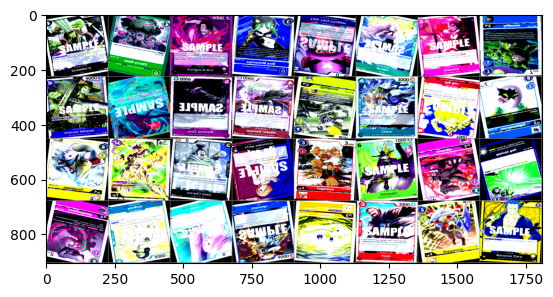

In [22]:
def imshow(img):
    img = img /2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [28]:
def validate_model(model, val_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Ensure they are on the correct device
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(val_loader)}")
    print(f"Validation Accuracy: {100 * correct / total}%")

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss

            loss.backward()  # Backward pass and optimization
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

        # Validate after each epoch
        validate_model(model, val_loader, criterion, device)
    

def test_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing', unit='batch'):
            images, labels = images.to(device), labels.to(device)  # Ensure they are on the correct device
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total}%")

In [30]:
num_classes = len(classes)  # Number of classes
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

c:\Users\Wayne\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Wayne\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Wayne/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:09<00:00, 5.14MB/s]


In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

test_model(model, test_loader)


Epoch 1/10: 100%|██████████| 36/36 [04:09<00:00,  6.93s/batch]


Epoch [1/10], Loss: 0.06793241988392158
Validation Loss: 2.533868819475174
Validation Accuracy: 75.30864197530865%


Epoch 2/10: 100%|██████████| 36/36 [03:49<00:00,  6.37s/batch]


Epoch [2/10], Loss: 0.00951013919499625
Validation Loss: 0.04168070142623037
Validation Accuracy: 98.76543209876543%


Epoch 3/10: 100%|██████████| 36/36 [03:47<00:00,  6.32s/batch]


Epoch [3/10], Loss: 0.00579855274109933
Validation Loss: 0.009629928241110974
Validation Accuracy: 99.58847736625515%


Epoch 4/10: 100%|██████████| 36/36 [04:01<00:00,  6.70s/batch]


Epoch [4/10], Loss: 0.0002458327331851251
Validation Loss: 0.00011581825194184603
Validation Accuracy: 100.0%


Epoch 5/10: 100%|██████████| 36/36 [04:50<00:00,  8.07s/batch]


Epoch [5/10], Loss: 0.0406637197259493
Validation Loss: 1.0499732494354248
Validation Accuracy: 85.18518518518519%


Epoch 6/10: 100%|██████████| 36/36 [03:49<00:00,  6.37s/batch]


Epoch [6/10], Loss: 0.01905952404882151
Validation Loss: 0.02981576111051254
Validation Accuracy: 98.76543209876543%


Epoch 7/10: 100%|██████████| 36/36 [03:45<00:00,  6.27s/batch]


Epoch [7/10], Loss: 0.005512639165115413
Validation Loss: 0.001404820267453033
Validation Accuracy: 100.0%


Epoch 8/10: 100%|██████████| 36/36 [03:42<00:00,  6.18s/batch]


Epoch [8/10], Loss: 0.007174264127924188
Validation Loss: 0.12232738872080517
Validation Accuracy: 96.70781893004116%


Epoch 9/10: 100%|██████████| 36/36 [03:57<00:00,  6.60s/batch]


Epoch [9/10], Loss: 0.027275136123231885
Validation Loss: 0.00047752028422110016
Validation Accuracy: 100.0%


Epoch 10/10: 100%|██████████| 36/36 [04:16<00:00,  7.12s/batch]


Epoch [10/10], Loss: 0.0008616733844569859
Validation Loss: 0.00010916384508163901
Validation Accuracy: 100.0%


Testing: 100%|██████████| 8/8 [00:24<00:00,  3.09s/batch]

Test Accuracy: 99.58847736625515%


In [62]:
model.eval()

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# IP camera URL (from your phone's IP webcam app)
url = "http://192.168.66.46:8080/video"  # Replace with your actual URL

# Open the video stream
cap = cv2.VideoCapture(url)

# # Class names (same order as in training)
# classes = ['Class1', 'Class2', 'Class3', ...]  # Replace with your actual class names

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture image")
        break
    
    # Display the video feed
    cv2.imshow('Laptop Camera Feed', frame)
    
    key = cv2.waitKey(1) & 0xFF
    
    # Predict when the spacebar is pressed
    if key == ord(' '):
        image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        image = transform(image).unsqueeze(0)
        with torch.no_grad():
            outputs = model(image)
            _, predicted = torch.max(outputs, 1)
        predicted_class = classes[predicted.item()]
        print(f'Prediction: {predicted_class}')
        cv2.putText(frame, f'Prediction: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        # cv2.imshow('Video Feed', frame)
    
    if key == ord('q'):
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()

Prediction: resized_digimontcg_images
Failed to capture image
